# 마켓과 머신러닝

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/1-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 생선 분류 문제
* 길이가 30cm 이상이면 도미로 분류
* 분류: 이진분류, 다항분류

→ 이진분류 활용

### 도미 데이터 준비하기
* 데이터를 구분하기 위한 특성
  * 길이
  * 무게

In [1]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
import matplotlib.pyplot as plt

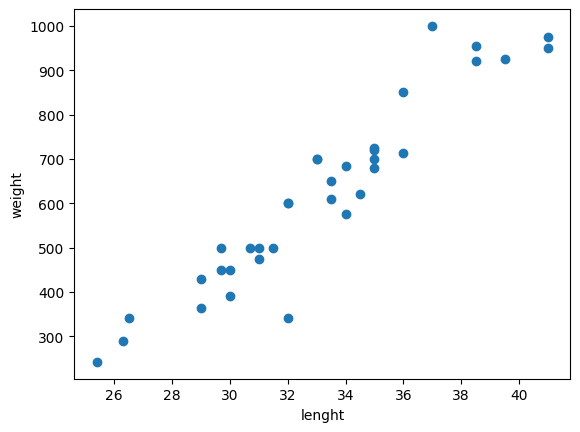

In [3]:
# 산점도 시각화
'''
수치 데이터를 이용할 경우 분포 확인 필요 : 시각화
선형 구조의 데이터 결과 확인됨 == 길이가 길면 무게가 무거워짐
'''
plt.scatter(bream_length, bream_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 준비하기

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0, 15.2]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9, 20.1]

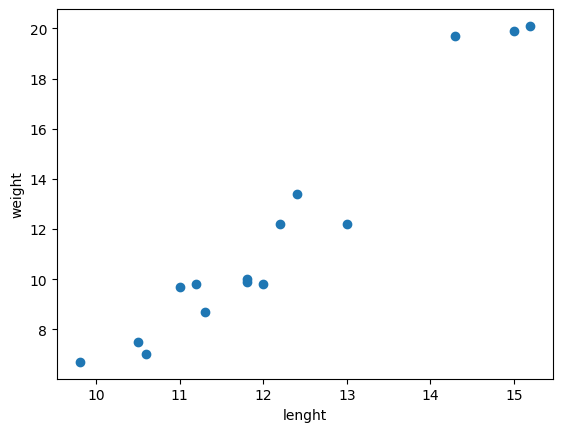

In [7]:
# 산점도 시각화
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

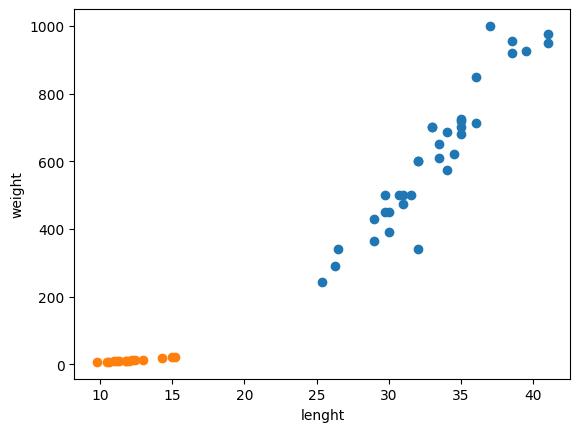

In [8]:
# 동시에 같이 보기
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 1️⃣ 데이터 준비

In [9]:
# 데이터 합치기 (데이터 준비)
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_length
print(fish_length)
print(fish_weight)
'''
도미 35개의 길이, 빙어 15개의 길이
도미 35개의 무게, 빙어 15개의 무게

== 1차원 데이터
'''

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0, 15.2]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0, 15.2]


In [14]:
#합쳐진 데이터 확인
fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
print(fish_data)
'''
2차원 데이터로 변경함
how?
[] 한 번 감싸고 그 안에 [l, w] 결과 도출함
(리스트의 리스트... 혹은 2차원 배열...)
'''

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 9.8], [10.5, 10.5], [10.6, 10.6], [11.0, 11.0], [11.2, 11.2], [11.3, 11.3], [11.8, 11.8], [11.8, 11.8], [12.0, 12.0], [12.2, 12.2], [12.4, 12.4], [13.0, 13.0], [14.3, 14.3], [15.0, 15.0], [15.2, 15.2]]


In [12]:
#정답데이터 준비
'''
지도 학습으로 하기 때문에 정답 데이터를 설정해두는 것 (지도 학습: 입력D + 정답D)
정답 데이터
* 1은 도미
* 0은 빙어
'''
fish_target = [1]*35 + [0]*15
# 데이터 하나 더 추가해서 15로 설정했습니다... ㅎ
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 2️⃣ 알고리즘 선정
* K-최근접 알고리즘

In [16]:
#KNN 라이브러리 삽입
# K-최근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# KNN 알고리즘 적용
kn = KNeighborsClassifier() #범위: 5

### 3️⃣ 모델 학습 (훈련)
* 도미를 찾기 위한 기준을 토대로 학습

In [19]:
#학습
kn.fit(fish_data, fish_target)
'''
(실제 데이터, 정답 데이터(0,1))
'''

KNeighborsClassifier()

### 4️⃣ 평가

In [20]:
#평가
kn.score(fish_data, fish_target)

1.0

### k-최근접 이웃 알고리즘

### 5️⃣ 예측

In [22]:
#예측하기
kn.predict([[30, 600]])

array([1])

In [23]:
kn.predict([[29, 300]])

array([1])

In [25]:
kn.predict([[28, 100]])

array([0])

In [26]:
kn.predict([[28, 300]])

array([1])

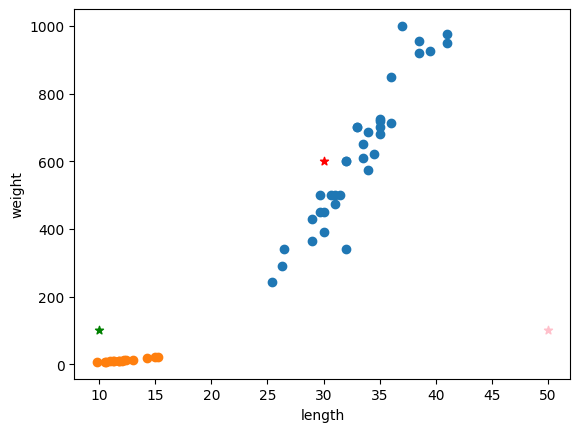

In [33]:
# 산점도 시각화 재 조정
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='*', c='r')
plt.scatter(10, 100, marker='*', c='g')
plt.scatter(50, 100, marker='*', c='pink') # 이상치?
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
#합습 데이터 출력
# 실제 데이터
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    9.8]
 [  10.5   10.5]
 [  10.6   10.6]
 [  11.    11. ]
 [  11.2   11.2]
 [  11.3   11.3]
 [  11.8   11.8]
 [  11.8   11.8]
 [  12.    12. ]
 [  12.2   12.2]
 [  12.4   12.4]
 [  13.    13. ]
 [  14.3   14.3]
 [  15.    15. ]
 [  15.2   15.2]]


In [38]:
#정답데이터
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
#범위 변경
kn49 = KNeighborsClassifier(n_neighbors=49)
# 하이퍼 파라미터 변경
# 기본 이웃 수 == 5개(한 분류에 5개씩 들어가는 느낌) → 49로 변경하고 결과 확인
# 49의 범위로 넣겠다는 거에 문제는 데이터 수와 맞지 않음 (== 15개 데이터를 가진 빙어 데이터는 전부 들어가는 것)

In [40]:
#학습과 평가
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7

In [41]:
print(35/49)

0.7142857142857143


In [ ]:
# 직접 계산하기

### 확인 문제

In [42]:
#이웃 변경해서 확인해보기
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n # 최근접 이웃 개수 설정
  score = kn.score(fish_data, fish_target) # 점수 계산
  if score < 1: # 100%(1.0)에 미치지 못하는 이웃 개수를 출력
    print(n, score)
    break

18 0.98


* 전처리 과정은 빠짐 (이미 수치형 데이터로 정돈되어 있었기 때문)